In [1]:
# !pip install -U transformers peft

In [2]:
from transformers import AutoModelForVision2Seq, AutoProcessor
from PIL import Image

import torch
import matplotlib.pyplot as plt

In [3]:
model_id = "HuggingFaceTB/SmolVLM-256M-Instruct"

In [4]:
model = AutoModelForVision2Seq.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    _attn_implementation="flash_attention_2" # Use `flash_attention_2` on Ampere GPUs and above and `eager` on older GPUs.
    # _attn_implementation="eager", # Use `flash_attention_2` on Ampere GPUs and above and `eager` on older GPUs.
)

processor = AutoProcessor.from_pretrained(model_id)

In [5]:
adapter_path = "smolvlm_receipt_ft/"
model.load_adapter(adapter_path)

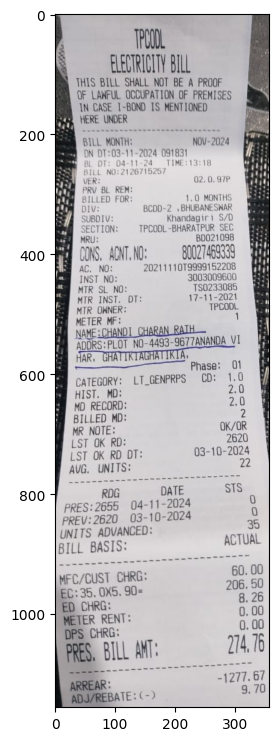

In [6]:
test_image = Image.open("inference_data/IMG-20241119-WA0001_cropped.jpg").convert("RGB")

plt.figure(figsize=(12, 9))
plt.imshow(test_image)
plt.show()

In [7]:
def test(model, processor, image, max_new_tokens=1024, device="cuda"):
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": "OCR this image accurately and give no other text"}
            ]
        },
    ]
    
    # Prepare the text input by applying the chat template
    text_input = processor.apply_chat_template(
        messages,  # Use the sample without the system message
        add_generation_prompt=True
    )

    image_inputs = []
    if image.mode != 'RGB':
        image = image.convert('RGB')
        
    image_inputs.append([image])

    # Prepare the inputs for the model
    model_inputs = processor(
        #text=[text_input],
        text=text_input,
        images=image_inputs,
        return_tensors="pt",
    ).to(device)  # Move inputs to the specified device

    # Generate text with the model
    generated_ids = model.generate(**model_inputs, max_new_tokens=max_new_tokens)

    # Trim the generated ids to remove the input ids
    trimmed_generated_ids = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    # Decode the output text
    output_text = processor.batch_decode(
        trimmed_generated_ids,
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )

    return output_text[0]  # Return the first decoded output text

In [8]:
output = test(model, processor, test_image)
print(output)

 TPCOD

ELECTRICITY BILL

THIS BILL SHALL NOT BE A PROOF

OF LAWFUL OCCUPATION OF PREMISES

IN CASE 1-BOND IS MENTIONED

HERE UNDER

BILL MONTH:

DN DT:03-11-2024

BL DT: 04-11-24

BILL NO:216715257

VER:

PRV:

BILL:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

BILLED FOR:

B